In [20]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
DATA_DIR = r'I:\NVTA\Needs_Assess_Model\2040_BASE_R4.0\NoVA\Results'
PERF_FILE_25 = os.path.join(DATA_DIR, 'FINAL_Performance_25.csv')
PERF_FILE_50 = os.path.join(DATA_DIR, 'FINAL_Performance_50.csv')
PERF_FILE_100 = os.path.join(DATA_DIR, 'FINAL_Performance_100.csv')

PERF_FILE_25, PERF_FILE_50, PERF_FILE_100

('I:\\NVTA\\Needs_Assess_Model\\2040_BASE_R4.0\\NoVA\\Results\\FINAL_Performance_25.csv',
 'I:\\NVTA\\Needs_Assess_Model\\2040_BASE_R4.0\\NoVA\\Results\\FINAL_Performance_50.csv',
 'I:\\NVTA\\Needs_Assess_Model\\2040_BASE_R4.0\\NoVA\\Results\\FINAL_Performance_100.csv')

In [8]:
df_25, df_50, df_100 = pd.read_csv(PERF_FILE_25), pd.read_csv(PERF_FILE_50), pd.read_csv(PERF_FILE_100)

In [9]:
df_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400094 entries, 0 to 1400093
Data columns (total 27 columns):
LINK           1400094 non-null int64
DIR            1400094 non-null int64
START          1400094 non-null object
END            1400094 non-null object
TTIME          1400094 non-null float64
PERSONS        1400094 non-null float64
SOV            1400094 non-null float64
HOV2           1400094 non-null float64
HOV3P          1400094 non-null float64
TRUCK          1400094 non-null float64
TRANSIT        1400094 non-null float64
VOLUME         1400094 non-null float64
ENTER          1400094 non-null float64
EXIT           1400094 non-null float64
FLOW           1400094 non-null float64
AVG_SPEED      1400094 non-null float64
TIME_RATIO     1400094 non-null float64
AVG_DELAY      1400094 non-null float64
AVG_DENSITY    1400094 non-null float64
MAX_DENSITY    1400094 non-null float64
AVG_QUEUE      1400094 non-null float64
MAX_QUEUE      1400094 non-null float64
NUM_FAIL     

In [10]:
useful_columns = ['LINK', 'DIR', 'START', 'TTIME', 'ENTER', 'VEH_DIST', 'VEH_TIME', 'VEH_DELAY']
join_columns = ['LINK', 'DIR', 'START']

In [11]:
df_25 = df_25.loc[:, useful_columns]
df_50 = df_50.loc[:, useful_columns]
df_100 = df_100.loc[:, useful_columns]

In [16]:
df_join_100_50 = pd.merge(left=df_100, right=df_50, left_on=join_columns, right_on=join_columns, suffixes=['_100', '_50'])
df_join = pd.merge(left=df_join_100_50, right=df_25, left_on=join_columns, right_on=join_columns)

In [17]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400094 entries, 0 to 1400093
Data columns (total 18 columns):
LINK             1400094 non-null int64
DIR              1400094 non-null int64
START            1400094 non-null object
TTIME_100        1400094 non-null float64
ENTER_100        1400094 non-null float64
VEH_DIST_100     1400094 non-null float64
VEH_TIME_100     1400094 non-null float64
VEH_DELAY_100    1400094 non-null float64
TTIME_50         1400094 non-null float64
ENTER_50         1400094 non-null float64
VEH_DIST_50      1400094 non-null float64
VEH_TIME_50      1400094 non-null float64
VEH_DELAY_50     1400094 non-null float64
TTIME            1400094 non-null float64
ENTER            1400094 non-null float64
VEH_DIST         1400094 non-null float64
VEH_TIME         1400094 non-null float64
VEH_DELAY        1400094 non-null float64
dtypes: float64(15), int64(2), object(1)
memory usage: 203.0+ MB


In [18]:
df_join['VMT_Ratio_50'] = df_join['VEH_DIST_50'] / df_join['VEH_DIST_100']

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


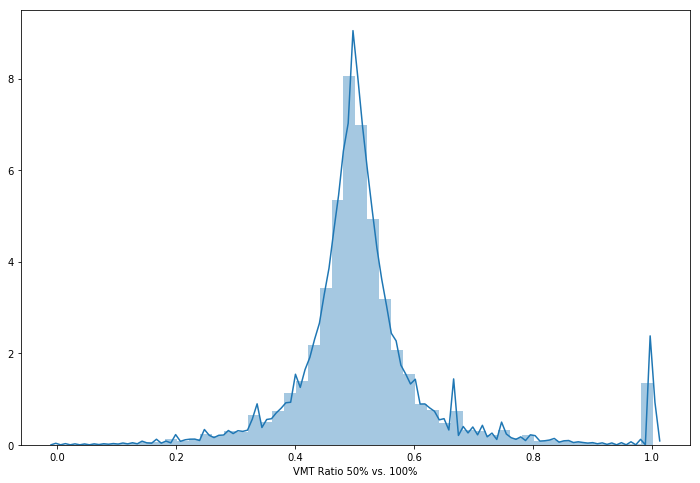

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(df_join['VMT_Ratio_50'].values, ax=ax)
ax.set_xlabel('VMT Ratio 50% vs. 100%');
ax.set_xlim([0, 1.05]);

In [27]:
df_join['VHT_Ratio_50'] = df_join['VEH_TIME_50'] / df_join['VEH_TIME_100']

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1.05)

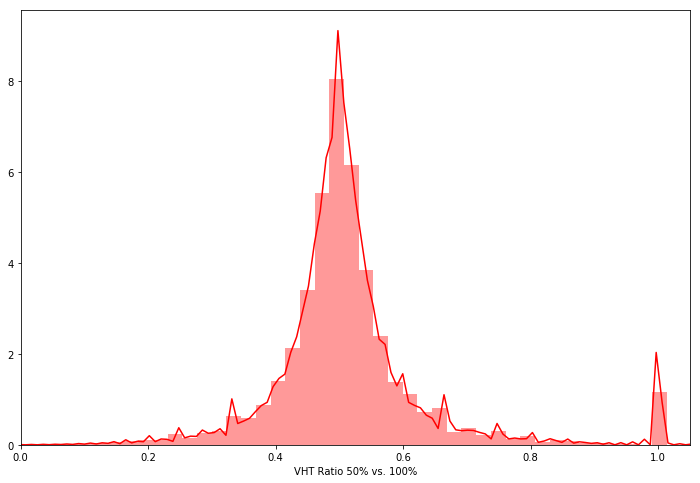

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(df_join['VHT_Ratio_50'].values, ax=ax, color='r')
ax.set_xlabel('VHT Ratio 50% vs. 100%');
ax.set_xlim([0, 1.05])

In [34]:
df_join['Delay_Ratio_50'] = df_join['VEH_DELAY_50'] / df_join['VEH_DELAY_100']
df_join['Delay_Ratio_50'] = df_join['Delay_Ratio_50'].fillna(1.0)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1.05)

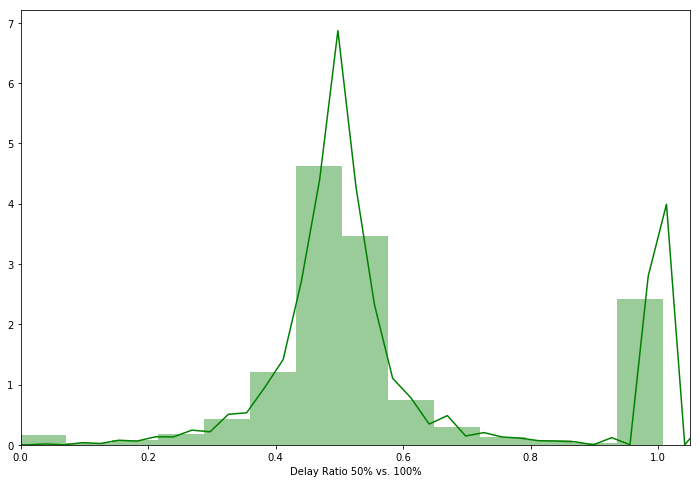

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(df_join['Delay_Ratio_50'].values, ax=ax, color='g')
ax.set_xlabel('Delay Ratio 50% vs. 100%');
ax.set_xlim([0, 1.05])